# Visualisation of Vault Stats
The following notebook is a visualisation of my obsidian vault stats. These stats are collected with the *Better Word Count* extentension. To first be able to print the data it must be parsed and normalized. This process happens below creating a dataframe with date as the index, and the words, characters, sentences, and more as the recorded values.

In [2]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd

# Read the data, and fill in missing days
df0 = pd.read_json('vault-stats.json')['history'].dropna()
df = pd.json_normalize(df0).set_index(pd.to_datetime(df0.index)) # type: ignore
df = df.asfreq('D',fill_value=0)

for i in range(len(df)):
    if not df.iloc[i,3:].sum(): df.iloc[i,3:] = df.iloc[i-1,3:]

From the dataframe we are able to visualise the data in a variety of graphs that illustrate different properties as time goes on.

Text(0, 0.5, 'Words')

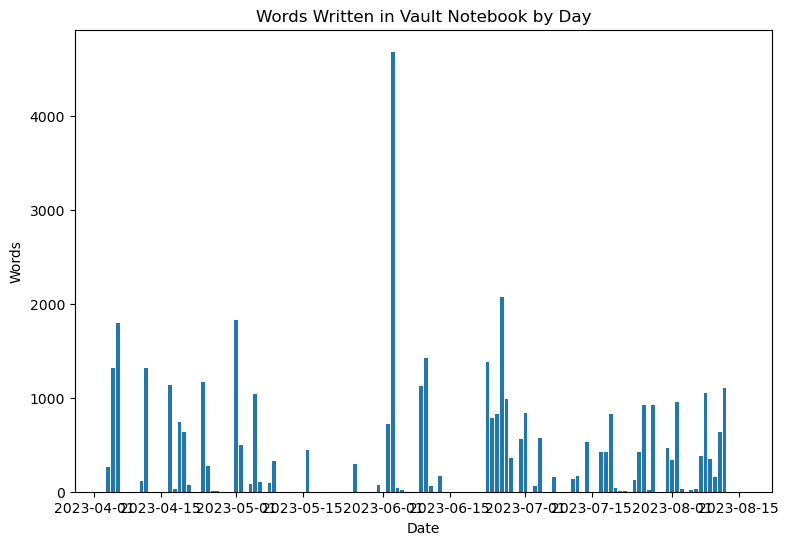

In [3]:
plt.rcParams['figure.figsize'] = [9, 6]
plt.bar(df.index,df['words'])
plt.title('Words Written in Vault Notebook by Day')
plt.xlabel('Date')
plt.ylabel('Words')

Text(0, 0.5, 'Words')

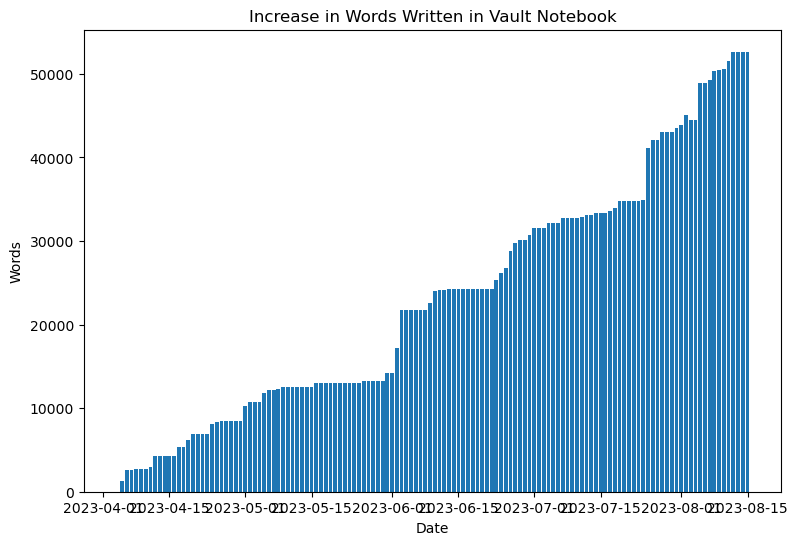

In [4]:

plt.bar(df.index,df['totalWords']-df['totalWords'][0])
plt.title('Increase in Words Written in Vault Notebook')
plt.xlabel('Date')
plt.ylabel('Words')